In [74]:
import pandas as pd

data = pd.read_csv("data/ML_Houses_dataset.csv")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data[["GrLivArea","SalePrice"]].head(10)

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
5,1362,143000
6,1694,307000
7,2090,200000
8,1774,129900
9,1077,118000


In [23]:
data.duplicated() # Check whether a row is a duplicated version of a previous row

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [28]:
data.isnull().sum().sort_values(ascending=False) /len(data)

WallMat        0.996575
PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 85, dtype: float64

In [24]:
data.duplicated().sum()

0

In [18]:
data.shape

(1760, 85)

In [78]:
data.drop(columns='WallMat', inplace=True)

In [81]:
data.shape

(1460, 84)

In [80]:
data = data.drop_duplicates()

In [96]:
import numpy as np

data.Alley.replace(np.nan, "NoAlley", inplace=True) #Replace NaN by "NoAlley"
data.Alley.value_counts()#Check count of each category

NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

In [98]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Check unique values for streets (3)
print(f"The unique values for 'Street' are {data.Alley.unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False) 

# Fit encoder
ohe.fit(data[['Alley']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

The unique values for 'Street' are ['NoAlley' 'Grvl' 'Pave']
The categories detected by the OneHotEncoder are [array(['Grvl', 'NoAlley', 'Pave'], dtype=object)]


In [99]:
ohe.transform(data[['Alley']])

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [100]:
ohe.get_feature_names_out()

array(['Alley_Grvl', 'Alley_NoAlley', 'Alley_Pave'], dtype=object)

In [101]:
data[ohe.get_feature_names_out()] = ohe.transform(data[['Alley']])

In [102]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,0.0,1.0,0.0
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,0.0,1.0,0.0
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,0.0,1.0,0.0
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,0.0,1.0,0.0


In [104]:
data.shape

(1460, 86)

In [106]:
from sklearn.preprocessing import OneHotEncoder

# Check unique values for streets (2)
print(f"The unique values for 'Street' are {data.Street.unique()}")

# Instantiate the OneHotEncoder
ohe_binary = OneHotEncoder(sparse = False, drop="if_binary") 

# Fit encoder
ohe_binary.fit(data[['Street']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe_binary.categories_}")

The unique values for 'Street' are ['Pave' 'Grvl']
The categories detected by the OneHotEncoder are [array(['Grvl', 'Pave'], dtype=object)]


In [111]:
# Display the generated names
print(f"The column names for the encoded values are {ohe_binary.get_feature_names_out()}")

# Transform the current "Street" column
data[ohe_binary.get_feature_names_out()] = ohe_binary.transform(data[['Street']])

# Drop the column "Street" which has been encoded
data.drop(columns = ["Street"], inplace = True)

# Show the dataset
data.head(3)

The column names for the encoded values are ['Street_Pave']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave,Street_Pave
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,0.0,1.0,0.0,1.0
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,0.0,1.0,0.0,1.0
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,0.0,1.0,0.0,1.0


In [112]:
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [113]:
target = penguins["species"]
target.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [128]:
data['SalePriceBinary'] = pd.cut(x = data['SalePrice'],
                                 bins=[data['SalePrice'].min()+500,
                                       data['SalePrice'].mean(),
                                       data['SalePrice'].max()], 
                                 labels=['cheap', 'expensive'])

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave,Street_Pave,SalePriceBinary
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,0.0,1.0,0.0,1.0,expensive
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,0.0,1.0,0.0,1.0,expensive
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,0.0,1.0,0.0,1.0,expensive
3,4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,0.0,1.0,0.0,1.0,cheap
4,5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,0.0,1.0,0.0,1.0,expensive


,level_0,level_1,0
0,Id,Id,1.000000
1,Id,MSSubClass,0.011156
2,Id,LotFrontage,-0.010601
3,Id,LotArea,-0.033226
4,Id,OverallQual,-0.028365
...,...,...,...
1931,Street_Pave,SalePrice,0.041036
1932,Street_Pave,Alley_Grvl,0.012097
1933,Street_Pave,Alley_NoAlley,-0.016562
1934,Street_Pave,Alley_Pave,0.010919


In [141]:
# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [147]:
data.drop(columns=['Pesos'], inplace=True)

In [152]:
strongest_feature = X[["GrLivArea"]]

# Re-instantiating a Logistic Regression
log_reg = LogisticRegression()

# Average accuracy of the cross-validated model
np.mean(cross_val_score(log_reg, strong_features, y, cv=10))

NameError: name 'strong_features' is not defined

In [149]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Encoding the target
target_encoder = LabelEncoder().fit(data['SalePriceBinary']) 
y = target_encoder.transform(data['SalePriceBinary'])

# Defining the features
X = data.drop(columns=['SalePrice', 'SalePriceBinary'])

# Scaling numerical features
# Notice that we already RobutScaled GrLivArea
minmax_scaler = MinMaxScaler()
X[["BedroomAbvGr","KitchenAbvGr","OverallCond"]] = minmax_scaler.fit_transform(X[["BedroomAbvGr","KitchenAbvGr","OverallCond"]])

# Instantiate model
log_reg = LogisticRegression(max_iter=1000) 

# Scoring on multiple folds aka Cross Validation
scores = cross_val_score(log_reg, X, y, cv=10)
scores.mean()

/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/Users/jinru/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'RL'


In [148]:
data.shape

(1460, 86)

In [143]:
corr_df.head()

,feature_1,feature_2,correlation
1,Id,MSSubClass,0.011156
2,Id,LotFrontage,-0.010601
3,Id,LotArea,-0.033226
4,Id,OverallQual,-0.028365
5,Id,OverallCond,0.012609


<AxesSubplot:>

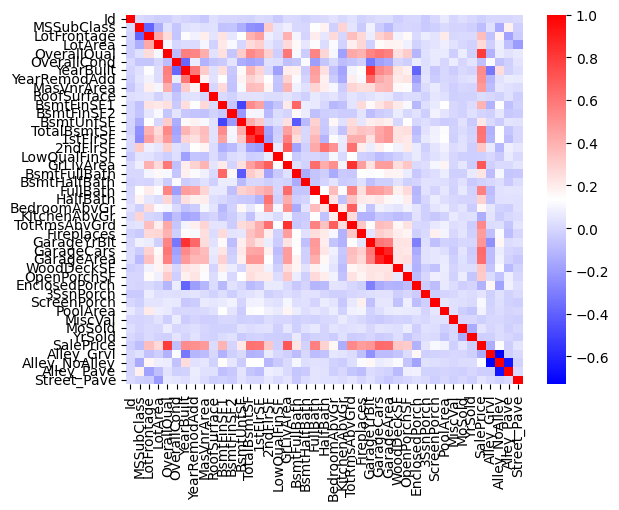

In [154]:
import seaborn as sns
%matplotlib inline

# Heatmap of pairwise correlations
correlation_matrix = data.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr")
# plt.show()

In [123]:
data[['SalePrice', 'SalePriceBinary']]

,SalePrice,SalePriceBinary
0,208500,expensive
1,181500,expensive
2,223500,expensive
3,140000,cheap
4,250000,expensive
...,...,...
1455,175000,cheap
1456,210000,expensive
1457,266500,expensive
1458,142125,cheap


In [121]:
pd.DataFrame({"target":target,"encoded_target":encoded_target}).sample(10)

,target,encoded_target
300,Gentoo,2
159,Chinstrap,1
216,Chinstrap,1
325,Gentoo,2
154,Chinstrap,1
144,Adelie,0
52,Adelie,0
232,Gentoo,2
86,Adelie,0
9,Adelie,0


In [114]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit it to the target
label_encoder.fit(target)

# Find the encoded classes
print(f"The Label Encoder has encoded the penguin classes into {label_encoder.classes_}")

# Transform the targets
encoded_target = label_encoder.transform(target)

The Label Encoder has encoded the penguin classes into ['Adelie' 'Chinstrap' 'Gentoo']


In [116]:
pd.DataFrame({"target":target,"encoded_target":encoded_target}).sample(10)

,target,encoded_target
299,Gentoo,2
304,Gentoo,2
84,Adelie,0
20,Adelie,0
141,Adelie,0
331,Gentoo,2
224,Gentoo,2
34,Adelie,0
232,Gentoo,2
44,Adelie,0


In [117]:
original_target = label_encoder.inverse_transform(encoded_target)

In [118]:
original_target

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [110]:
data[ohe_binary.get_feature_names_out()] = ohe_binary.transform(data[['Street']])
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave,Street_Pave
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,208500,0.0,1.0,0.0,1.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,181500,0.0,1.0,0.0,1.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,223500,0.0,1.0,0.0,1.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,140000,0.0,1.0,0.0,1.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,250000,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,8,2007,WD,Normal,175000,0.0,1.0,0.0,1.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2010,WD,Normal,210000,0.0,1.0,0.0,1.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,2500,5,2010,WD,Normal,266500,0.0,1.0,0.0,1.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,4,2010,WD,Normal,142125,0.0,1.0,0.0,1.0


In [107]:
ohe_binary.transform(data[['Street']])

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [103]:
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "Street" column
data[ohe.get_feature_names_out()] = ohe.transform(data[['Alley']])

# Drop the column "Street" which has been encoded
data.drop(columns = ["Alley"], inplace = True)

# Show the dataset
data.head(3)

The column names for the encoded values are ['Alley_Grvl' 'Alley_NoAlley' 'Alley_Pave']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_NoAlley,Alley_Pave
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500,0.0,1.0,0.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500,0.0,1.0,0.0


In [97]:
data.Alley.head()

0    NoAlley
1    NoAlley
2    NoAlley
3    NoAlley
4    NoAlley
Name: Alley, dtype: object

In [36]:
(data.Pesos.isnull().sum()/len(data))

0.00684931506849315

In [32]:
(data.Alley.isnull().sum()/len(data))

0.9376712328767123

In [56]:
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="mean") 

# Call the "fit" method on the object
imputer.fit(data[['Pesos']]) 

SimpleImputer()

In [58]:
# Call the "transform" method on the object
data['Pesos'] = imputer.transform(data[['Pesos']]) 
# The mean is stored in the transformer's memory
imputer.statistics_ 

array([3606867.68275862])

In [57]:
data[data['Pesos'].isnull()]['Pesos'].head()

14    NaN
20    NaN
104   NaN
131   NaN
141   NaN
Name: Pesos, dtype: float64

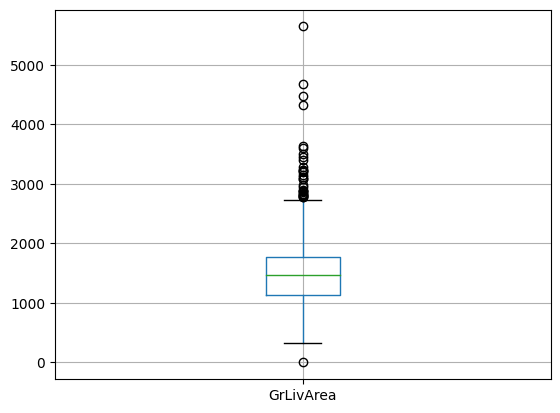

In [60]:
data[['GrLivArea']].boxplot();

In [76]:
data[data['GrLivArea']>5000]['GrLivArea']

1298    5642
1717    5642
Name: GrLivArea, dtype: int64

In [82]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


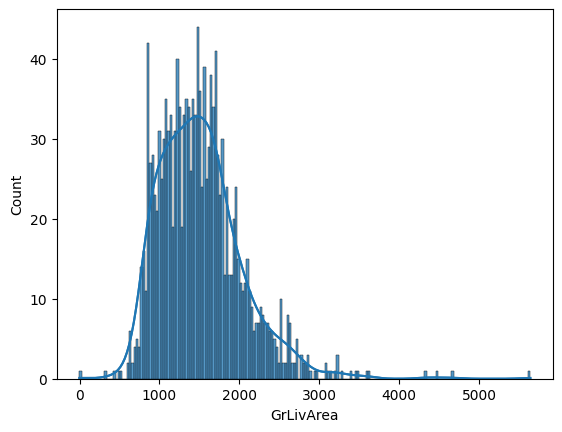

In [84]:
import seaborn as sns
sns.histplot(data['GrLivArea'], bins=200,kde = True);
plt.show()

In [85]:
from sklearn.preprocessing import RobustScaler

# Step 0 - Instanciate Robust Scaler

rb_scaler = RobustScaler() 

In [86]:
rb_scaler.fit(data[['GrLivArea']]) 

# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house

data['GrLivArea'] = rb_scaler.transform(data[['GrLivArea']]) 

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
data['GrLivArea'].max()

6.455001931247586

In [91]:
example = pd.DataFrame({"classes":["bad", "average", "average", "good", "good", "bad", "good"]})
example

,classes
0,bad
1,average
2,average
3,good
4,good
5,bad
6,good


In [94]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["bad","average","good"]])

# Fit it
ordinal_encoder.fit(example[["classes"]])

# Display the learned categories
display(ordinal_encoder.categories_)


[array(['bad', 'average', 'good'], dtype=object)]

In [120]:
original_classes

array([['bad'],
       ['average'],
       ['average'],
       ['good'],
       ['good'],
       ['bad'],
       ['good']], dtype=object)

In [119]:
original_classes = ordinal_encoder.inverse_transform(example[["encoded_classes"]])


In [95]:
# Transforming categories into ordered numbers
example["encoded_classes"] = ordinal_encoder.transform(example[["classes"]])

# Showing the transformed classes
example

,classes,encoded_classes
0,bad,0.0
1,average,1.0
2,average,1.0
3,good,2.0
4,good,2.0
5,bad,0.0
6,good,2.0


In [ ]:
ordinal_encoder = OrdinalEncoder(categories = [["bad","average","good"]])

# Fit it
ordinal_encoder.fit(example[["classes"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
example["encoded_classes"] = ordinal_encoder.transform(example[["classes"]])

# Showing the transformed classes
example

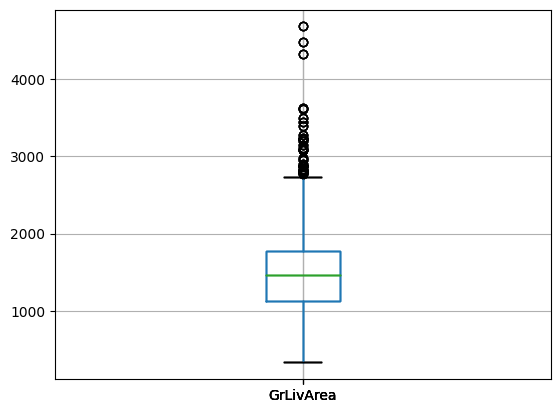

In [72]:
import matplotlib.pyplot as plt
boolean_mask = (data['GrLivArea']>0) & (data['GrLivArea']<5000)

# Applying the boolean filteraing
data = data[boolean_mask].reset_index(drop=True)

# Visualize boxplot again
data[['GrLivArea']].boxplot()
plt.show()

In [11]:
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

WallMat        0.996575
PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 85, dtype: float64

In [12]:
(data.WallMat.isnull().sum()/len(data))

0.9965753424657534

In [13]:
data.drop(columns='WallMat', inplace=True) # Drop WallMat column 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
(data.Alley.isnull().sum()/len(data))


0.9376712328767123